In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import plotly.io as pio
pio.renderers.default='notebook'
%matplotlib notebook

In [7]:
'''Cargamos la base con el embbeding'''
Neurons = '/home/lorenzo/Principal/Doctorado/Noise-Neuron discriminator/Datos/Neuron_P303132_embedded'
Neurons = pd.read_pickle(Neurons) 


,level_0,index,PatientExperiment,Channel,Cluster,Bulk,bNoise,Mean,embedding
0,0,1372,HEC031_rsvpscr1,67,2,"[[-11.563305894690258, -8.207125932148251, -2....",0,"[2.4272503765462266, 2.4051030656860397, 2.465...","[[2.4272503765462266, 2.4051030656860397, 2.46..."
1,1,1373,HEC031_rsvpscr1,83,3,"[[25.134183936912756, 18.264913446080172, 17.2...",0,"[12.950971328709867, 12.062644027736404, 11.41...","[[12.950971328709867, 12.062644027736404, 11.4..."
2,2,1374,HEC031_rsvpscr2,69,2,"[[2.535495475658796, -2.1098178596102617, -2.1...",0,"[6.568477785692699, 6.369601444895855, 6.28384...","[[6.568477785692699, 6.369601444895855, 6.2838..."
3,3,1375,HEC031_rsvpscr3,71,4,"[[9.359468024719913, 8.570355071768784, 11.648...",0,"[5.8442197547900525, 5.898919139197591, 6.0909...","[[5.8442197547900525, 5.898919139197591, 6.090..."
4,4,1376,HEC031_rsvpscr3,74,2,"[[6.804122982915662, 10.93099612654017, 14.016...",0,"[5.67095538611333, 5.832288725892976, 5.783794...","[[5.67095538611333, 5.832288725892976, 5.78379..."
5,5,1377,HEC031_rsvpscr3,74,3,"[[-4.7274146197619835, -5.185022375335492, -3....",0,"[7.898280724794503, 7.817960958767313, 7.80861...","[[7.898280724794503, 7.817960958767313, 7.8086..."
6,6,1378,HEC031_rsvpscr3,81,2,"[[-1.8825719980169981, -0.7267238453650615, 2....",0,"[5.133138288149504, 5.082163344635526, 5.24903...","[[5.133138288149504, 5.082163344635526, 5.2490..."
7,7,1379,HEC031_rsvpscr3,81,3,"[[-3.5320597182025883, 3.172608936717381, 7.72...",0,"[0.5509782728943118, 0.585677488424892, 0.7100...","[[0.5509782728943118, 0.585677488424892, 0.710..."
8,8,1380,HEC031_rsvpscr5,68,2,"[[12.289918747913735, 10.855729318224581, 7.11...",0,"[6.521846634584926, 6.8747441642524185, 6.9859...","[[6.521846634584926, 6.8747441642524185, 6.985..."
9,9,1381,HEC031_rsvpscr5,69,3,"[[13.038932127529359, 8.263961090010689, 4.996...",0,"[6.7585591242221845, 6.896314646438427, 6.7165...","[[6.7585591242221845, 6.896314646438427, 6.716..."


<IPython.core.display.Javascript object>


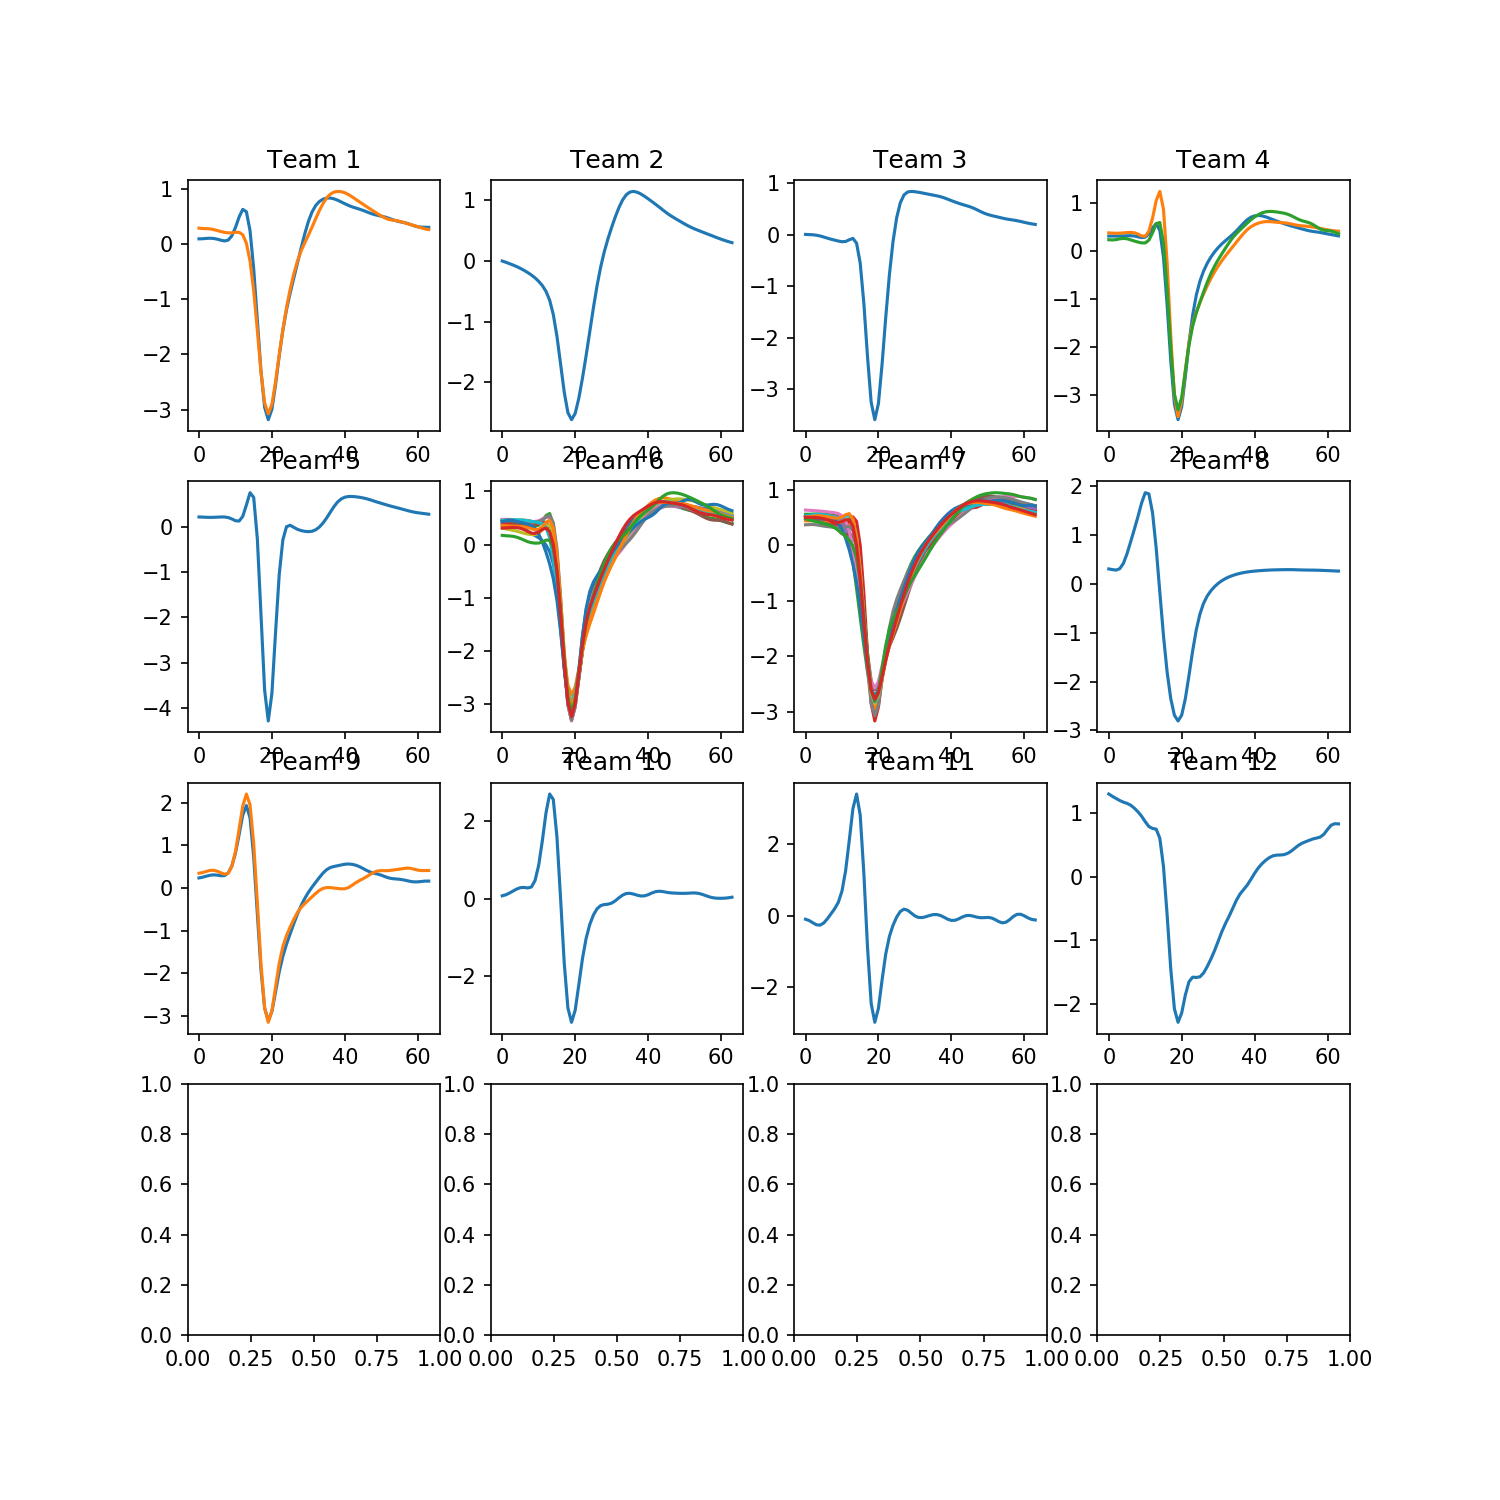

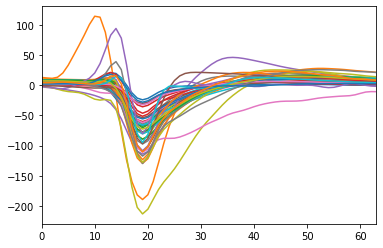

In [15]:
df_list.plot(legend = False)

In [8]:
'''Clasificador usando el ojimetro'''
g0 = [2]
g1 = [19,20,18,21,17,22]
g2 = [23,16,24,25,26,15,27]
g3 = [28,29,30,14,31,32,33]
g4 = [34,13,35,36,37,38]
gs = np.array([g0,g1,g2,g3,g4])
dfs = {i:pd.DataFrame.from_records(Neurons.embedding.loc[g].to_list(),columns= ['x','y','z']) for i,g in enumerate(gs)}

In [9]:
'''SINDY'''
data = dfs[0].values
x = data[:,0][0]
y = data[:,1][0]
z = data[:,2][0]
xr=np.roll(x,1)
yr=np.roll(y,1)
zr=np.roll(z,1)
dxdt=(xr-x)
dydt=(yr-y)
dzdt=(zr-z)

In [10]:
theta=np.zeros((len(x),13))
theta[:,0]=np.ones_like(x)
theta[:,1]=x
theta[:,2]=y
theta[:,3]=z
theta[:,4]=x*x
theta[:,5]=x*y
theta[:,6]=x*z
theta[:,7]=y*y
theta[:,8]=y*z
theta[:,9]=z*z
theta[:,10]= np.sin(x)
theta[:,11]= np.sin(y)
theta[:,12]= np.sin(z)

In [11]:
print('ajuste de x,y,z\n')
clf=linear_model.Lasso(alpha=0.1,max_iter=10000000,fit_intercept=False,normalize=False)
clf.fit(-theta,dxdt)
Mx = clf.coef_

clf=linear_model.Lasso(alpha=0.1,max_iter=10000000,fit_intercept=False,normalize=False)
clf.fit(-theta,dydt)
My = clf.coef_

clf=linear_model.Lasso(alpha=0.1,max_iter=10000000,fit_intercept=False,normalize=False)
clf.fit(-theta,dzdt)
Mz = clf.coef_



ajuste de x,y,z



In [12]:
def f(X,t):
    x,y,z = X
    vector = [1,x,y,z,x**2,x*y,x*z,y**2,y*z,z**2,np.sin(x),np.sin(y),np.sin(z)]
    dxdt =  np.dot(Mx,vector)
    dydt = np.dot(My,vector)
    dzdt = np.dot(Mz,vector)
    return (dxdt,dydt,dzdt)


In [14]:
X0 = (6.56,6.28,6.21)
t = np.arange(65)
tray = odeint(f,X0,t)

In [15]:
x = tray.T[0]
y = tray.T[1]
z = tray.T[2]

<IPython.core.display.Javascript object>


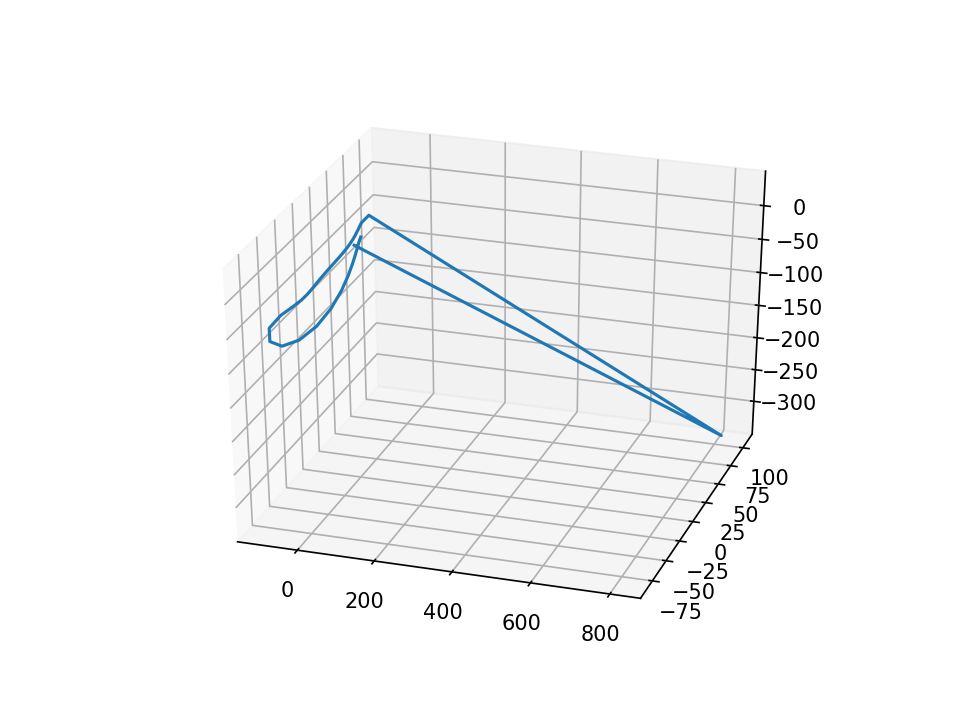

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)

In [188]:
tray = list(tray)

In [189]:
tray.sort(key = lambda x:max(x))

In [190]:
tray

[array([-73.32158389, -82.46874454, -60.81033146]),
 array([-91.27254357, -73.22445847, -52.44014484]),
 array([-49.14748956, -79.19074444, -69.2250413 ]),
 array([-85.27837405, -59.92633313, -47.17846226]),
 array([-70.16868501, -50.72171635, -42.83965124]),
 array([-58.7477255 , -45.00796742, -38.51057959]),
 array([-51.38167982, -40.77121666, -34.24170657]),
 array([-46.17667436, -36.93580713, -30.08944934]),
 array([-29.95284521, -65.92511411, -73.12574045]),
 array([-41.82335591, -33.11009235, -26.10499881]),
 array([-37.68602597, -29.25171176, -22.33687606]),
 array([-33.53349065, -25.44973306, -18.81545432]),
 array([-15.76422296, -48.63212762, -70.0389105 ]),
 array([-29.41582163, -21.80747746, -15.54449308]),
 array([-25.43588384, -18.397411  , -12.50364105]),
 array([-21.64929923, -15.24327281,  -9.65606065]),
 array([-18.14661059, -12.33388433,  -6.94997118]),
 array([ -6.63228267, -32.33134149, -60.26314741]),
 array([-14.89364933,  -9.63988403,  -4.32105301]),
 array([-11.

In [201]:
tray = np.array(tray)

/home/lorenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in less



TypeError: only integer scalar arrays can be converted to a scalar index

In [224]:
filter(lambda x: np.isnan(x).any(),tray)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [220]:
np.isnan(tray[-1]).any()

True